In [67]:
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)
process_data_cleveland<-read_delim("processed.cleveland.data", delim=",", col_names = FALSE)|>
rename(
    age = X1,
    sex = X2,
    cp=X3,
    trestbps = X4,
    chol = X5,
    fbs= X6, 
    restecg  =X7,
    thalach =X8,
    exang=X9,
    oldpeak=X10,
    slope=X11,
    ca =X12,
    thal=X13,
    num =X14)



# cleaning, wrangling data
process_data_cleveland[process_data_cleveland == "?" ] <- NA


#renaming Sex as Male or Female for better readability, Renaming CP (chest pain type)
cleveland_data_renamed<-process_data_cleveland|>
                    mutate(diagnosis=ifelse(is.na(num),NA,(num > 0)))|>
                    mutate(sex= as.factor(sex),
                           cp= as.factor(cp), 
                           fbs= as.factor(fbs),
                           restecg= as.factor(restecg),
                           exang= as.factor(exang),
                           thal= as.factor(thal),
                           ca= as.factor(ca),
                           slope= as.factor(slope), 
                           diagnosis=as.factor(diagnosis))|>
                    mutate(sex= fct_recode(sex,"Male" = "1", "Female" = "0"))|>
                    mutate(cp= fct_recode(cp,"Typical Angina"="1", "Atypical Angina"="2","Non-Anginal Pain"="3","Asymptomatic"="4"))|>
                    mutate(severity=num)|>
                    select(-num)

cleveland_data_renamed

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age sex    cp               trestbps chol fbs restecg thalach exang oldpeak
1   63  Male   Typical Angina   145      233  1   2       150     0     2.3    
2   67  Male   Asymptomatic     160      286  0   2       108     1     1.5    
3   67  Male   Asymptomatic     120      229  0   2       129     1     2.6    
4   37  Male   Non-Anginal Pain 130      250  0   0       187     0     3.5    
5   41  Female Atypical Angina  130      204  0   2       172     0     1.4    
6   56  Male   Atypical Angina  120      236  0   0       178     0     0.8    
7   62  Female Asymptomatic     140      268  0   2       160     0     3.6    
8   57  Female Asymptomatic     120      354  0   0       163     1     0.6    
9   63  Male   Asymptomatic     130      254  0   2       147     0     1.4    
10  53  Male   Asymptomatic     140      203  1   2       155     1     3.1    
11  57  Male   Asymptomatic     140      192  0   0       148     0     0.4    
12  56  Female Atypical Angina  140      294  0   2       153     0     1.3    
13  56  Male   Non-Anginal Pain 130      256  1   2       142     1     0.6    
14  44  Male   Atypical Angina  120      263  0   0       173     0     0.0    
15  52  Male   Non-Anginal Pain 172      199  1   0       162     0     0.5    
16  57  Male   Non-Anginal Pain 150      168  0   0       174     0     1.6    
17  48  Male   Atypical Angina  110      229  0   0       168     0     1.0    
18  54  Male   Asymptomatic     140      239  0   0       160     0     1.2    
19  48  Female Non-Anginal Pain 130      275  0   0       139     0     0.2    
20  49  Male   Atypical Angina  130      266  0   0       171     0     0.6    
21  64  Male   Typical Angina   110      211  0   2       144     1     1.8    
22  58  Female Typical Angina   150      283  1   2       162     0     1.0    
23  58  Male   Atypical Angina  120      284  0   2       160     0     1.8    
24  58  Male   Non-Anginal Pain 132      224  0   2       173     0     3.2    
25  60  Male   Asymptomatic     130      206  0   2       132     1     2.4    
26  50  Female Non-Anginal Pain 120      219  0   0       158     0     1.6    
27  58  Female Non-Anginal Pain 120      340  0   0       172     0     0.0    
28  66  Female Typical Angina   150      226  0   0       114     0     2.6    
29  43  Male   Asymptomatic     150      247  0   0       171     0     1.5    
30  40  Male   Asymptomatic     110      167  0   2       114     1     2.0    
⋮   ⋮   ⋮      ⋮                ⋮        ⋮    ⋮   ⋮       ⋮       ⋮     ⋮      
274 71  Female Asymptomatic     112      149  0   0       125     0     1.6    
275 59  Male   Typical Angina   134      204  0   0       162     0     0.8    
276 64  Male   Typical Angina   170      227  0   2       155     0     0.6    
277 66  Female Non-Anginal Pain 146      278  0   2       152     0     0.0    
278 39  Female Non-Anginal Pain 138      220  0   0       152     0     0.0    
279 57  Male   Atypical Angina  154      232  0   2       164     0     0.0    
280 58  Female Asymptomatic     130      197  0   0       131     0     0.6    
281 57  Male   Asymptomatic     110      335  0   0       143     1     3.0    
282 47  Male   Non-Anginal Pain 130      253  0   0       179     0     0.0    
283 55  Female Asymptomatic     128      205  0   1       130     1     2.0    
284 35  Male   Atypical Angina  122      192  0   0       174     0     0.0    
285 61  Male   Asymptomatic     148      203  0   0       161     0     0.0    
286 58  Male   Asymptomatic     114      318  0   1       140     0     4.4    
287 58  Female Asymptomatic     170      225  1   2       146     1     2.8    
288 58  Male   Atypical Angina  125      220  0   0       144     0     0.4    
289 56  Male   Atypical Angina  130      221  0   2       163     0     0.0    
290 56  Male   Atypical Angina  120      240  0   0       169     0     0.0    
291 67  Male   Non-Anginal Pain 152      212  0   2       150     0     0.8    
292 

In [73]:
cleveland_split <- initial_split(cleveland_data_renamed, prop = 3/4, strata = diagnosis)

cleveland_training <- training(cleveland_split)
cleveland_testing <- testing(cleveland_split)

cleveland_training <- cleveland_training |>
                    select(c('diagnosis','chol' , 'age', 'sex', 'thalach', 'fbs', 'exang', 'trestbps','diag'))
head(cleveland_training)
     

ERROR: [1m[33mError[39m in `select()`:[22m
[33m![39m Can't subset columns that don't exist.
[31m✖[39m Column `diag` doesn't exist.


In [32]:
#summarizing to get min, max, mean of each predictor + total no. of rows per class
cleveland_summary <- cleveland_training |>
                    group_by(diag) |>
                    summarize(
                              min_chol = min(chol), max_chol = max(chol), mean_chol = mean(chol), 
                              min_thalach = min(thalach), max_thalach = max(thalach), mean_thalach = mean(thalach),
                              n_of_patients = n())

cleveland_summary

diag  min_chol max_chol mean_chol min_thalach max_thalach mean_thalach
1 FALSE 126      564      243.3740  111         194         159.2846    
2  TRUE 167      409      253.5288   71         195         139.8942    
  n_of_patients
1 123          
2 104

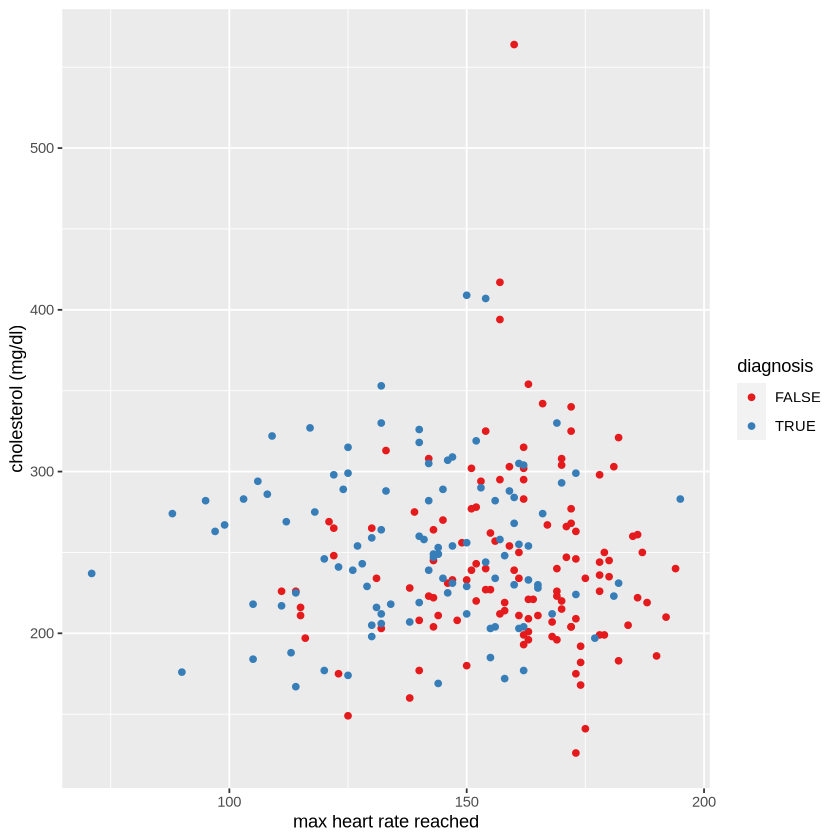

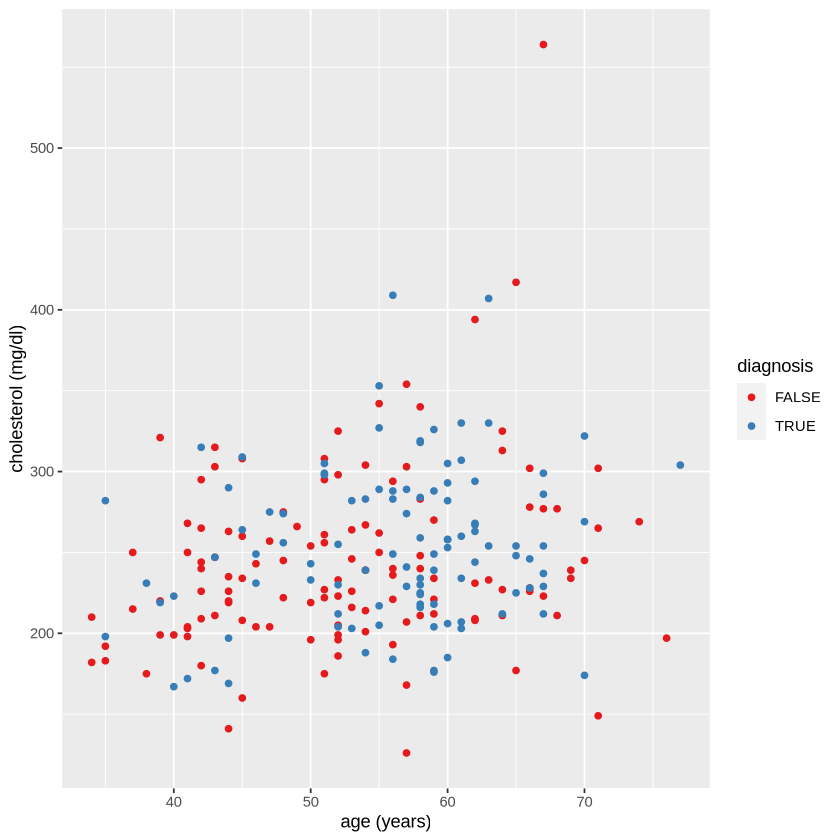

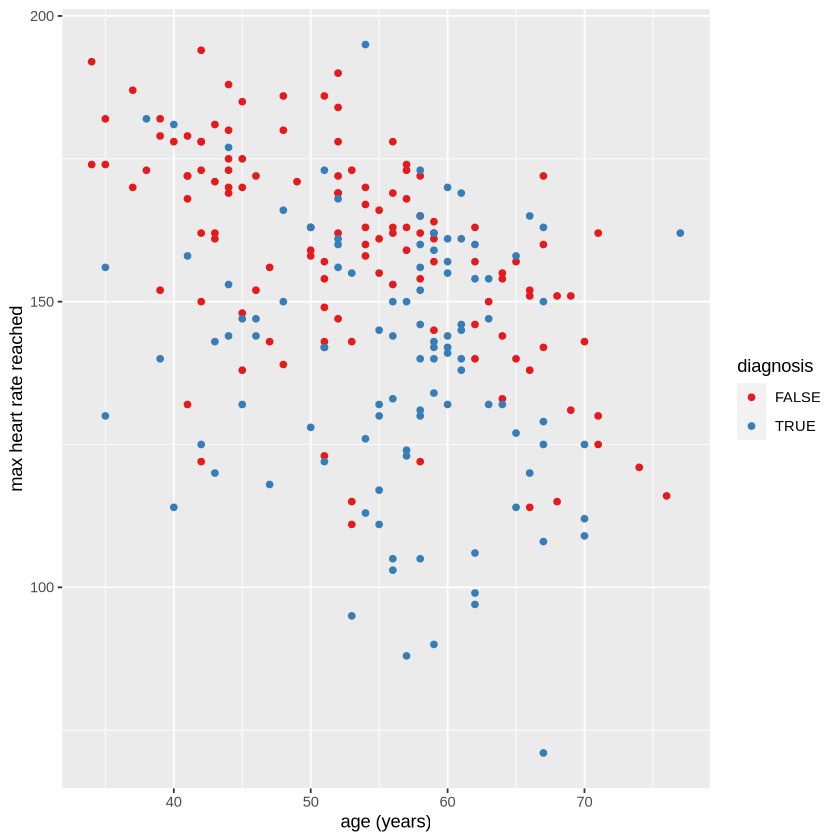

In [33]:
plot1 <- ggplot(cleveland_training, aes(x = thalach, y = chol, color = diag)) +
                 geom_point() +
                 labs(x = "max heart rate reached", y = "cholesterol (mg/dl)", color = "diagnosis") +
                 scale_color_brewer(palette = "Set1")

plot2 <- ggplot(cleveland_training, aes(x = age, y = chol, color = diag)) +
                 geom_point() +
                 labs(x = "age (years)", y = "cholesterol (mg/dl)", color = "diagnosis") +
                 scale_color_brewer(palette = "Set1")

plot3 <- ggplot(cleveland_training, aes(x = age, y = thalach, color = diag)) +
                 geom_point() +
                 labs(x = "age (years)", y = "max heart rate reached", color = "diagnosis") +
                 scale_color_brewer(palette = "Set1")

plot1
plot2
plot3